# Testing different Hyperparameters

Lets say we're curious about __how different learning rates and different batch sizes affect our model's accuracy when restricted to 5 epochs__, and we want to build an experiment to test out these hyperparameters.

In this notebook, we'll walk through the following:

- use python to perform this experiment
- use the CLI to perform this experiment
- evalute the results using Pandas

---

In [21]:
import sys
sys.path.append("../../")
import pandas as pd
import os
import seaborn as sns

from utils_ic import ic_root_path
from utils_ic.datasets import unzip_url, Urls, data_path
from utils_ic.benchmark import (
    prettify_df, benchmark, Architecture, TrainingSchedule, get_parameters
)
from utils_ic.datasets import unzip_urls

Lets download some data that we want to test on. To use the benchmarking tool for single label classification, we'll need to make sure that the data is stored such that images are sorted into their classes inside of a subfolder. In this notebook, we'll use the FridgeObjects dataset provided in `utils_ic.datasets.Urls`, which is stored in the correct format.

In [2]:
input_data = unzip_url(Urls.fridge_objects_path, exist_ok=True)

## Using Python

Before we start testing, it's a good idea to see what the default parameters. We can use a the helper function `get_parameters` to easily get those default values.

Use `get_parameters??` to see what the method signature looks like, and also what the defaults are. 

In [ ]:
get_parameters??

Now that we know the defaults, we can pass in the list of the parameters we want to benchmark. 

In this notebook, we want to see the effect of different learning rates across different batch sizes using only 5 epochs (the default number of epochs is 15). To do so, I would run the `get_parameters` functions as follows:

```python
params = get_parameters(lrs=[1e-3, 1e-4], batch_sizes=[8, 16, 32], epochs=[5])
```

Notice that all parameters must be passed in as a list, including single values such as `epochs=[5]`.

These parameters will be used to calculate the number of permutations to run. In this case, we've passed in `lrs=[1e-3, 1e-4]`, `batch_sizes=[8, 16, 32]`, and `epochs=[5]`. This will result in 2 X 3 X 1 total permutations (in otherwords, 6 permutations). 

In [3]:
params = get_parameters(lrs=[1e-3, 1e-4], batch_sizes=[8, 16, 32], epochs=[5])

Now that we have our parameters defined, we call the function `benchmark()` which takes in those params. 

We also need to pass in:
- the number of repetitions to run each permutation
- whether or not we want the training to stop early if the metric (accuracy) doesn't improve by 0.01 (1%) over 3 epochs

In [4]:
reps = 3
early_stopping = False

The `benchmark()` function returns a multi-index dataframe which we can work with right away.

In [5]:
df = benchmark([input_data], params, reps, early_stopping); df

duration  \
0 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  11.642213   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  13.906147   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  11.110645   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  12.041291   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  14.240275   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  15.548488   
1 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  11.960977   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  13.963951   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  11.066178   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  11.794110   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  13.822289   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  11.051716   
2 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  11.670126   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  13.913020   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  11.162782   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  11.730842   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  13.919001   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  11.198136   

                                                                    accuracy  
0 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.840909  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.704545  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.840909  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.931818  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.522727  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.954545  
1 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.886364  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.681818  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.840909  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.886364  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.840909  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.818182  
2 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.909091  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.568182  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.886364  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.772727  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.681818  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.886364

## Using the CLI tool to benchmark

Instead of using python to run this experiment, we may want to test from the CLI. We can do so by using the `scripts/benchmark.py` file. 

First we move up to the `/image_classification` directory.

In [6]:
os.chdir(ic_root_path())

To reproduce the same test (different learning rates across different batch sizes using only 5 epochs), and the same settings (datasets in 'tmp_data', 3 repetitions, and no early_stopping) we can run the following:

```sh
python scripts/benchmark.py 
    --learning-rates 1e-3 1e-4 
    --batch-sizes 8 16 32 
    --epochs 5 
    --repeat 3 
    --no-early-stopping 
    --inputs <my-data-dir>
    --output lr_bs_test.csv
```

Additionally, we've added an output parameter, which will automatically dump our dataframe into a csv file.

To simplify the command, we can use the acryonyms of the params. We can also remove `--no-early-stopping` as that is the default behavior.

```sh
python scripts/benchmark.py -lr 1e-3 1e-4 -bs 8 16 32 -e 5 -r 3 -i <my-data-dir> -o lr_bs_test.csv
```

HINT: You can learn more about how to use the script: `python script/benchmark.py --help`

In [4]:
# use {sys.executable} instead of just running `python` to ensure the command is executed using the environment cvbp
!{sys.executable} scripts/benchmark.py -l 1e-3 1e-4 -bs 8 16 32 -e 5 -r 3 -i {input_data} -o data/lr_bs_test.csv

Running 1 of 6 permutations. Repeat 1 of 3.
Running 2 of 6 permutations. Repeat 1 of 3.      
Running 3 of 6 permutations. Repeat 1 of 3.      
Running 4 of 6 permutations. Repeat 1 of 3.      
Running 5 of 6 permutations. Repeat 1 of 3.      
Running 6 of 6 permutations. Repeat 1 of 3.      
Running 1 of 6 permutations. Repeat 2 of 3.      
Running 2 of 6 permutations. Repeat 2 of 3.      
Running 3 of 6 permutations. Repeat 2 of 3.      
Running 4 of 6 permutations. Repeat 2 of 3.      
Running 5 of 6 permutations. Repeat 2 of 3.      
Running 6 of 6 permutations. Repeat 2 of 3.      
Running 1 of 6 permutations. Repeat 3 of 3.      
Running 2 of 6 permutations. Repeat 3 of 3.      
Running 3 of 6 permutations. Repeat 3 of 3.      
Running 4 of 6 permutations. Repeat 3 of 3.      
Running 5 of 6 permutations. Repeat 3 of 3.      
Running 6 of 6 permutations. Repeat 3 of 3.      
Total Time elapsed: 32.6 seconds.                
Output has been saved to '/home/jiata/code/cvbp/image_cl

Once the script completes, load the csv into a dataframe to explore it's contents. We'll want to specify `index_col=[0, 1, 2]` since it is a multi-index dataframe.

In [21]:
df = pd.read_csv("data/lr_bs_test.csv", index_col=[0, 1, 2]); df

duration  \
0 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.838662   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  1.092153   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.647182   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.792494   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  1.198691   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  4.770589   
1 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.786056   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  1.113328   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.656206   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.786065   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  1.188282   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.681003   
2 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.871925   
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  1.070272   
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.649098   
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.769118   
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  1.063724   
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.787141   

                                                                    accuracy  
0 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.363636  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.431818  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.295455  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.250000  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.181818  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.272727  
1 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.181818  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.318182  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.227273  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.250000  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.250000  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.181818  
2 lr: 0.0001, epochs: 5, batch_size: 16, im_size:... fridgeObjects  0.136364  
  lr: 0.0001, epochs: 5, batch_size: 32, im_size:... fridgeObjects  0.181818  
  lr: 0.0001, epochs: 5, batch_size: 8, im_size: ... fridgeObjects  0.181818  
  lr: 0.001, epochs: 5, batch_size: 16, im_size: ... fridgeObjects  0.409091  
  lr: 0.001, epochs: 5, batch_size: 32, im_size: ... fridgeObjects  0.272727  
  lr: 0.001, epochs: 5, batch_size: 8, im_size: 2... fridgeObjects  0.227273

---

## Visualizing our results

When we read in out multi-index dataframe, index 0 represents the run number, index 1 represents a single permutation of parameters, and index 2 represents the dataset.

To see the results, show the df using the `prettify_df` function. This will display all the hyperparameters in a nice, readable way.

In [7]:
prettify_df(df.T)

Since we've run our benchmarking over 3 repetitions, we may want to just look at the averages across the different __run numbers__.

In [8]:
prettify_df(df.mean(level=(1,2)).T)

,lr: 0.0001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True
,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects,fridgeObjects
duration,11.757772,13.927706,11.113202,11.855414,13.993855,12.599447
accuracy,0.878788,0.651515,0.856061,0.863636,0.681818,0.886364


Additionally, we may want simply to see which set of hyperparameters perform the best across the different __datasets__. We can do that by averaging the results of the different datasets. (The results of this step will look similar to the above since we're only passing in one dataset).

In [9]:
prettify_df(df.mean(level=(1)).T)

,lr: 0.0001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True
duration,11.757772,13.927706,11.113202,11.855414,13.993855,12.599447
accuracy,0.878788,0.651515,0.856061,0.863636,0.681818,0.886364


In [37]:
df.mean(level=(1)).iloc[:, [0]]

,duration
"lr: 0.0001, epochs: 5, batch_size: 16, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",11.757772
"lr: 0.0001, epochs: 5, batch_size: 32, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",13.927706
"lr: 0.0001, epochs: 5, batch_size: 8, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",11.113202
"lr: 0.001, epochs: 5, batch_size: 16, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",11.855414
"lr: 0.001, epochs: 5, batch_size: 32, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",13.993855
"lr: 0.001, epochs: 5, batch_size: 8, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True",12.599447


In [69]:
# cm = sns.light_palette("green", as_cmap=True)
# df.mean(level=(1)).iloc[:, [1]].T.style.background_gradient(cmap=cm, high=1, low=0.5, axis=1)
prettify_df(df.mean(level=(1)).T)

,lr: 0.0001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.0001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 16 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 32 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True,lr: 0.001 epochs: 5 batch_size: 8 im_size: 299 arch: resnet18 transforms: True dropout: 0.5 weight_decay: 0.01 training_schedule: head_first_then_body discriminative_lr: True one_cycle_policy: True
duration,11.757772,13.927706,11.113202,11.855414,13.993855,12.599447
accuracy,0.878788,0.651515,0.856061,0.863636,0.681818,0.886364


In [78]:
df.mean(level=(1)).T.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>lr: 0.0001, epochs: 5, batch_size: 16, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True</th>\n      <th>lr: 0.0001, epochs: 5, batch_size: 32, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True</th>\n      <th>lr: 0.0001, epochs: 5, batch_size: 8, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True</th>\n      <th>lr: 0.001, epochs: 5, batch_size: 16, im_size: 299, arch: resnet18, transforms: True, dropout: 0.5, weight_decay: 0.01, training_schedule: head_first_then_body, discriminative_lr: True, one_cycle_policy: True<

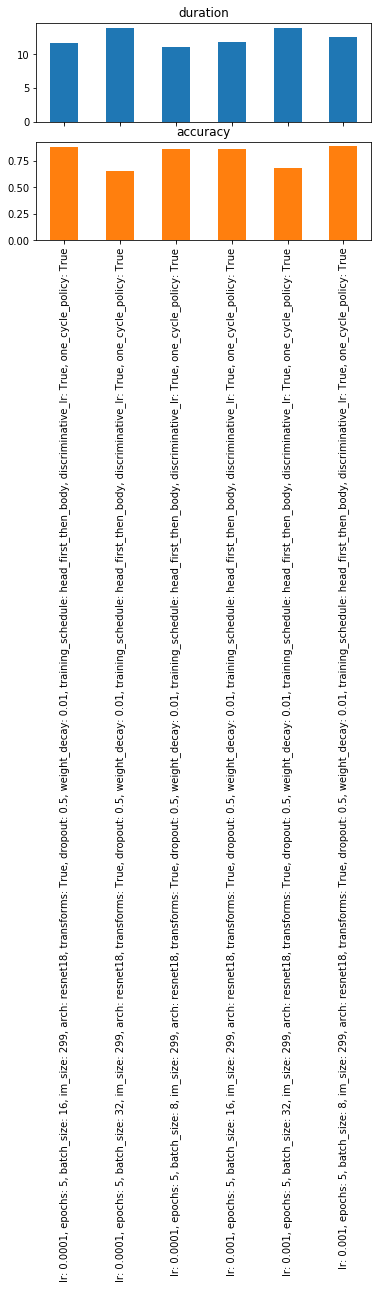

In [77]:
axes = df.mean(level=(1)).plot.bar(rot=90, subplots=True, legend=False)

---

## Clean up

Clean up the data directory we created since we've finished with our benchmarks.

In [ ]:
shutil.rmtree("tmp_data")